## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms.

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="500">

## Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups. Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html

Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="500">

Here are some real-world applications of clustering:

* Customer segmentation 
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation

# Cluster Wines based on their Chemical Constituents 

## Problem Statement

This dataset is adapted from the Wine Data Set from https://archive.ics.uci.edu/ml/datasets/wine by removing the information about the types of wine for unsupervised learning.

The following descriptions are adapted from the UCI webpage:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:

* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

## Downloading the Data

We can download the dataset from Kaggle and import directly into the Jupyter notebook using the `pandas` library. 

In [4]:
! pip install pandas

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
# Importing datasets
 
wine_data = pd.read_csv("wine-clustering.csv")
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


We currently possess a dataset comprising 173 rows and 13 columns, excluding the cluster type. Notably, the dataset is devoid of any null values, facilitating a seamless transition into the model-building phase. 

However, for a more comprehensive understanding of the data, it would be prudent to examine the statistical values of the dataset before proceeding further in the model development process.

In [5]:
# Descriptive statistics of the `wine_data` dataset.
wine_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Ash_Alcanity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid_Phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color_Intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


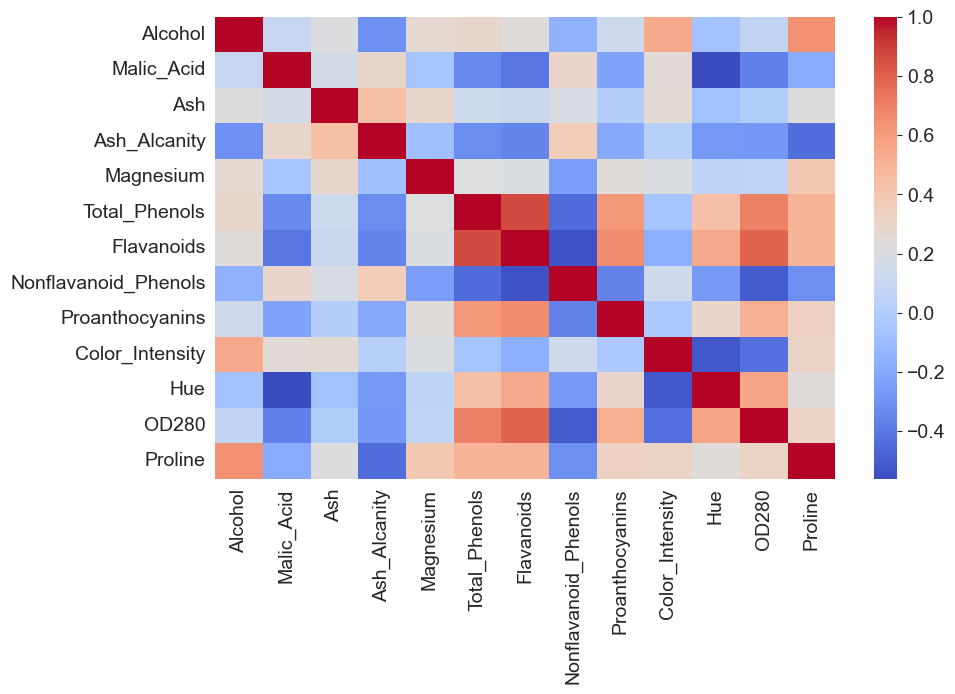

In [6]:
# Correlation heatmap
correlation_matrix = wine_data.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm")
plt.show()

Observation drawn are:

1. `Proline` is highly with correlated with different parameter than others in extreme terms.

2. `Flavaniods` is highly as well as positively correlated with `Total_Phenols` and `OD280`.

3. Strangely, `Malic_Acid` and `Nonflavaniod_Phenols` are negatively correlated with other parameter but slightly psoitively correlated with each other as they are not directly correlated substances.

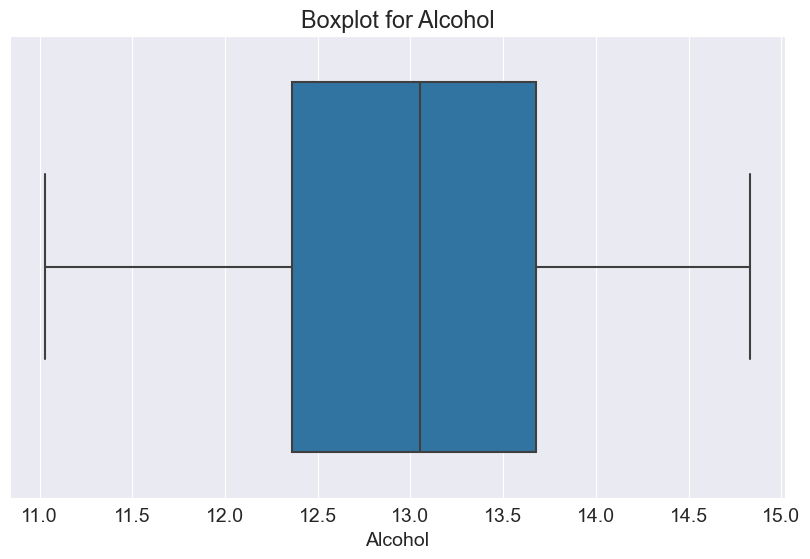

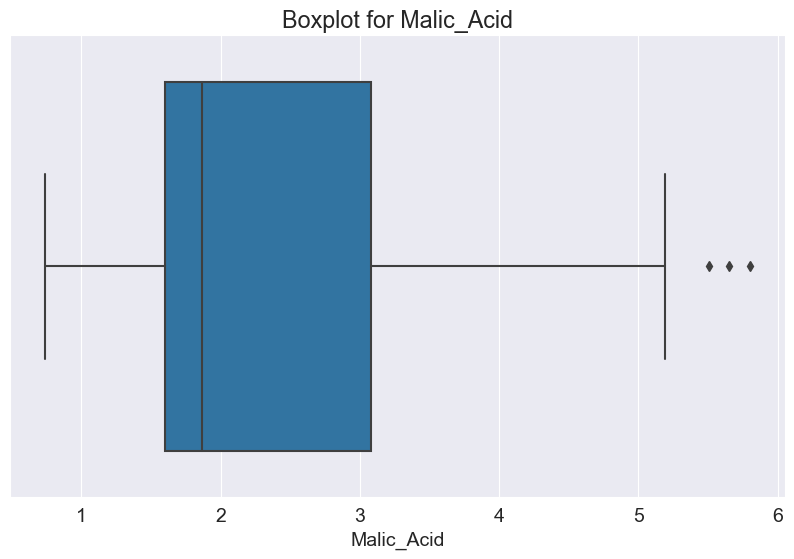

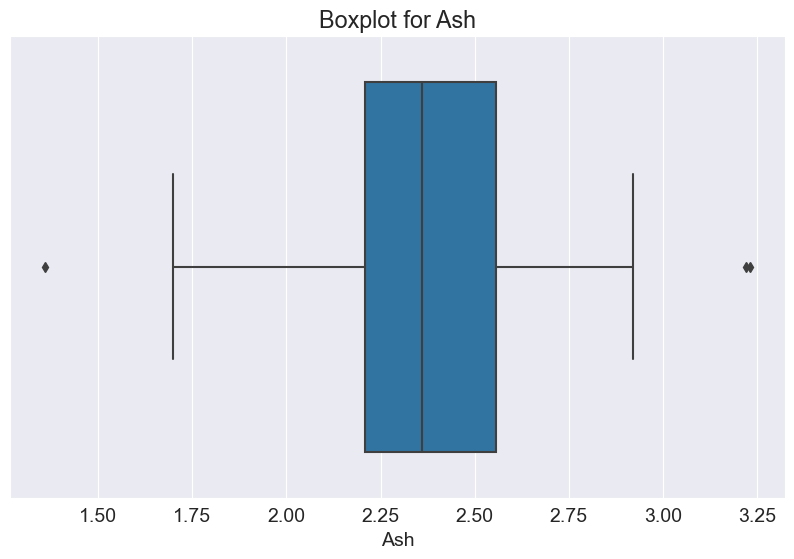

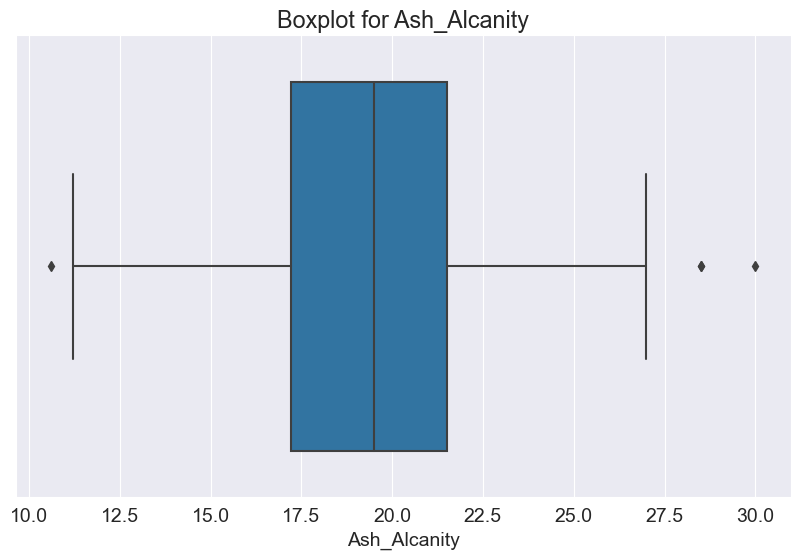

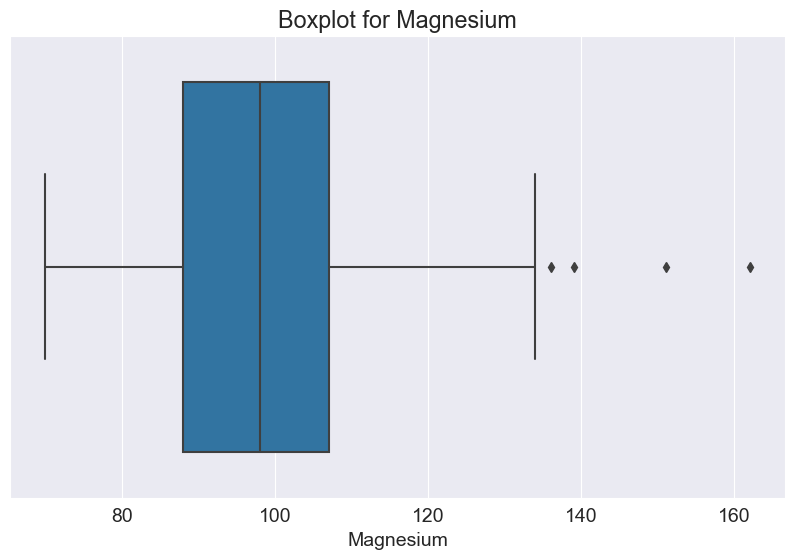

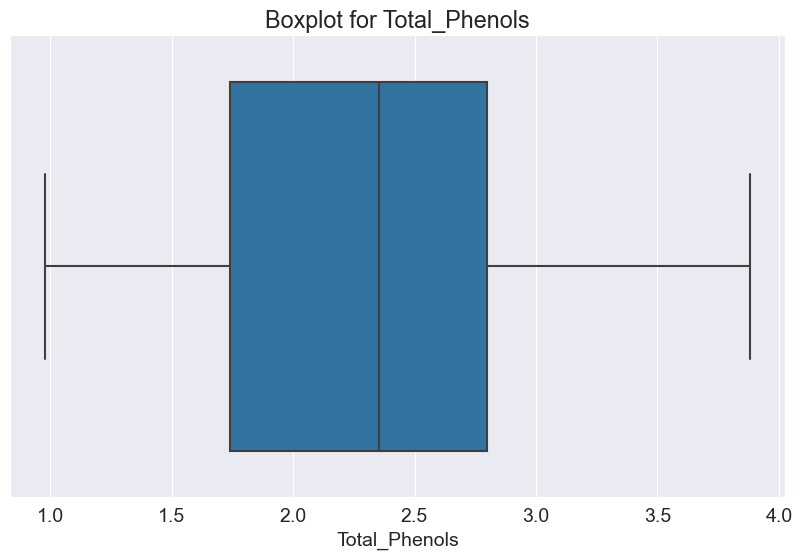

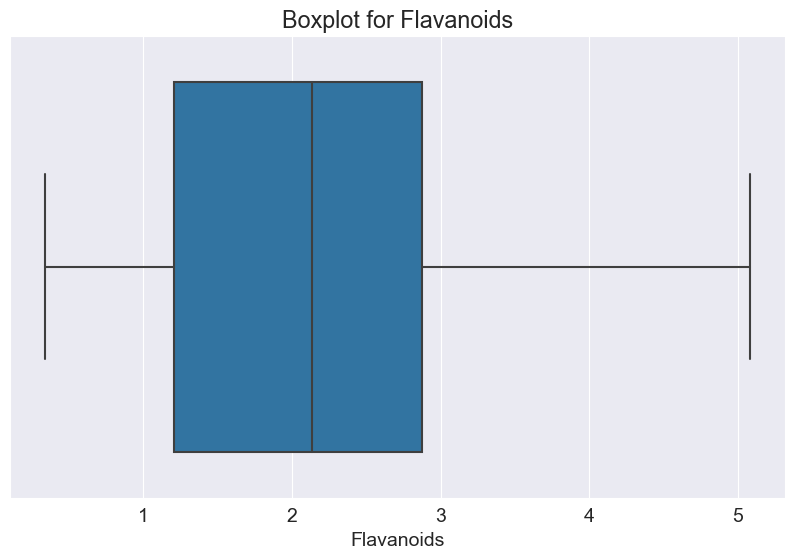

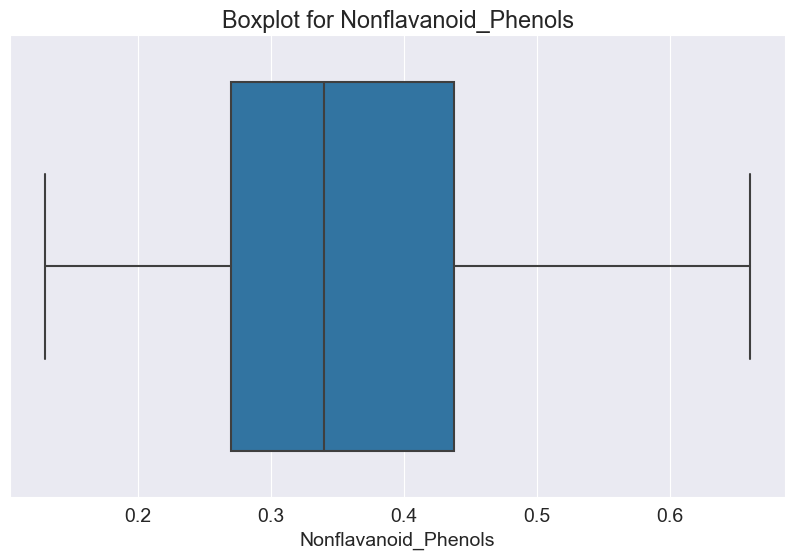

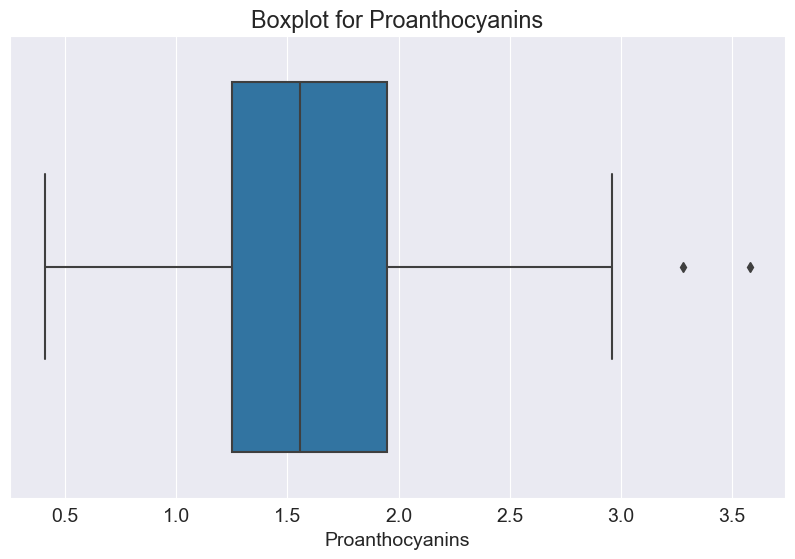

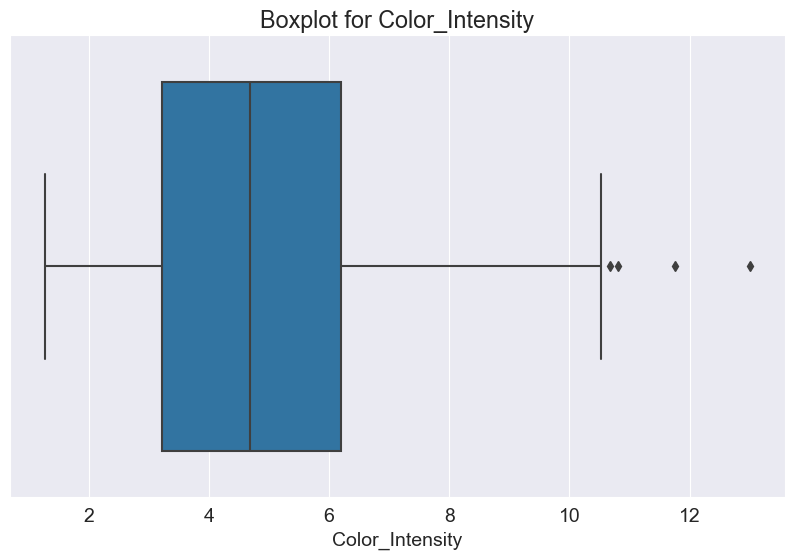

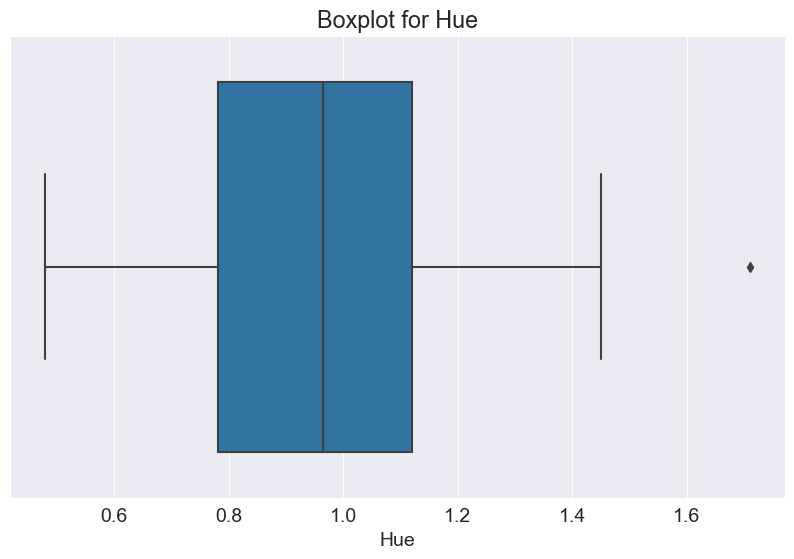

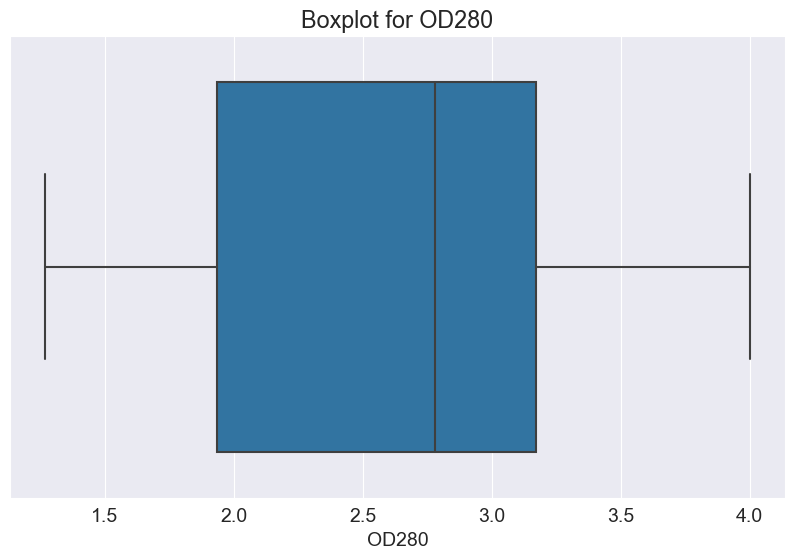

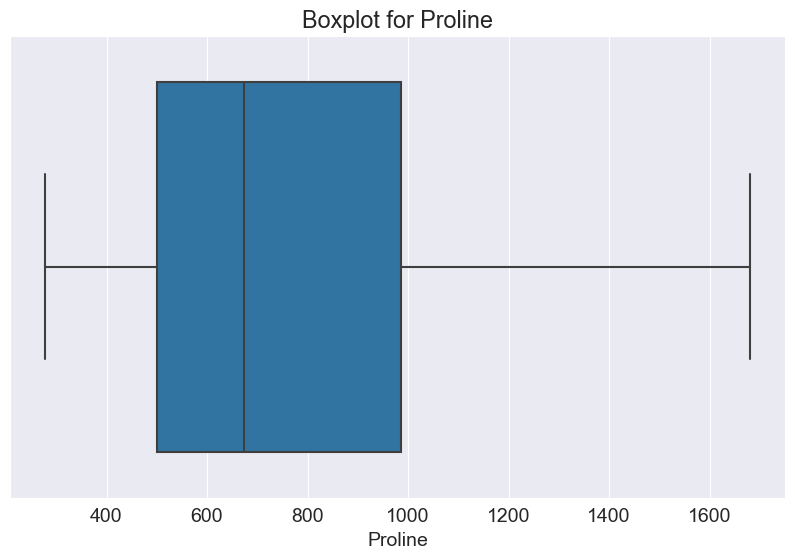

In [7]:
# Boxplot for each feature
for column in wine_data.columns:
    plt.figure()
    sns.boxplot(x=wine_data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

Observation drawn are:

1. In this dataset `Malic_Acid`, `Ash`, `Ash_Alcanity`, `Magnesium`,`Proanthocyanins`, `Color_Intensity`, `Hue` have some outliers or noise.

2. `Alcohol` and `Color_Intensity` Interquartile range (IQR) is symmetrically distributed around the median, meaning data is equally dispersed on both sides of the median.

3. `Malic_Acid`, `Nonflavanoid_Phenols`, `Proline`, `Ash`, `Proanthocyanins` box more dispersed towards Q3 could be an indication of positive skewness, meaning that the tail of the distribution is extending towards higher values. Suggest the presence of outliers on the higher side which is true for  some parameters.

4. `Ash_Alcanity`, `Total_Phenols`, `Flavanoids`, `Magnesium`, `Hue`, `OD280` have box more dispersed towards Q1 could be an indication of negative skewness, meaning that the tail of the distribution is extending towards lower values. 

In [8]:
wine_cols = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
X= wine_data[wine_cols]
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


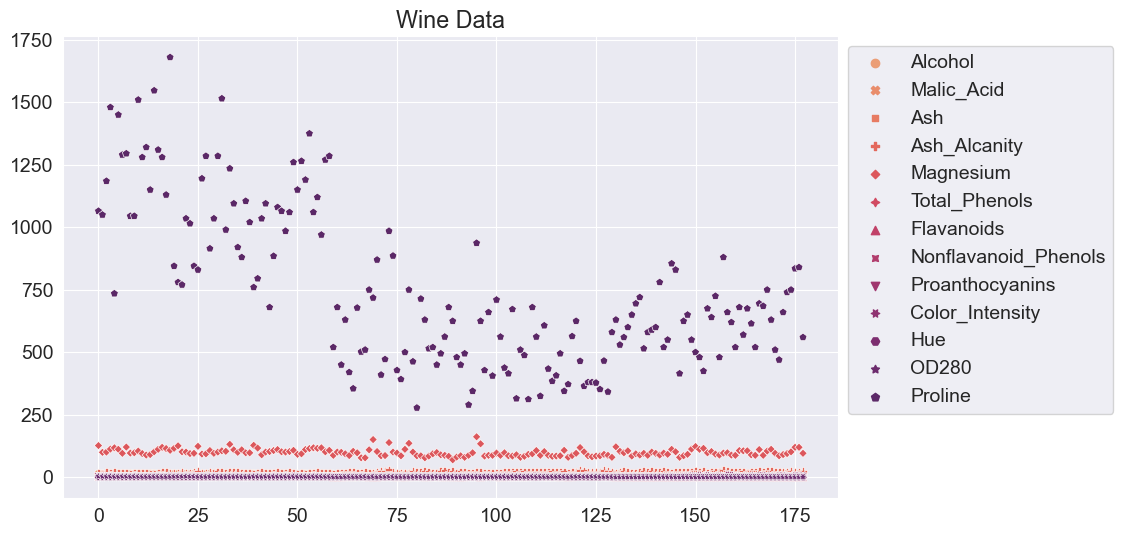

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= wine_data,palette='flare')
plt.title('Wine Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### Data Standardization using Z - Score normlization 

Data standardization, also known as data normalization, is a preprocessing step in which the features of a dataset are scaled or transformed to have a mean of 0 and a standard deviation of 1. 

In Wine data, data is not standardized. Proline feature values are all above 250, some feature values are very small. As some Algorithms are sensitive to scale of input features(such as K-Means, Support Vector Machines (SVM), and Principal Component Analysis (PCA)), we need to standardize data. 

There are several methods to normalization like min-max normalization, z-score normalization or mean normalization. Here we used Z-score normalization also known as Standardization method.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [11]:
# Standardizing the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(wine_data)

# Splitting data into train, val and test datasets
X_train, test = train_test_split(X_standardized, test_size=0.4,random_state=42 )
X_val, X_test = train_test_split(test, test_size= 0.5, random_state=42)

In [12]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(106, 13)
(36, 13)
(36, 13)


##### Silhouette Coefficient:

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

* 1: Means clusters are well apart from each other and clearly distinguished.

* 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

* -1: Means clusters are assigned in the wrong way.

`Silhouette Score = (b-a)/max(a,b)`

where

-- a= average intra-cluster distance i.e the average distance between each point within a cluster.

-- b= average inter-cluster distance i.e the average distance between all clusters.

In [13]:
from sklearn.metrics import silhouette_score

### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

Let's apply K-means clustering to the Wine dataset.

In [14]:
from sklearn.cluster import KMeans

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

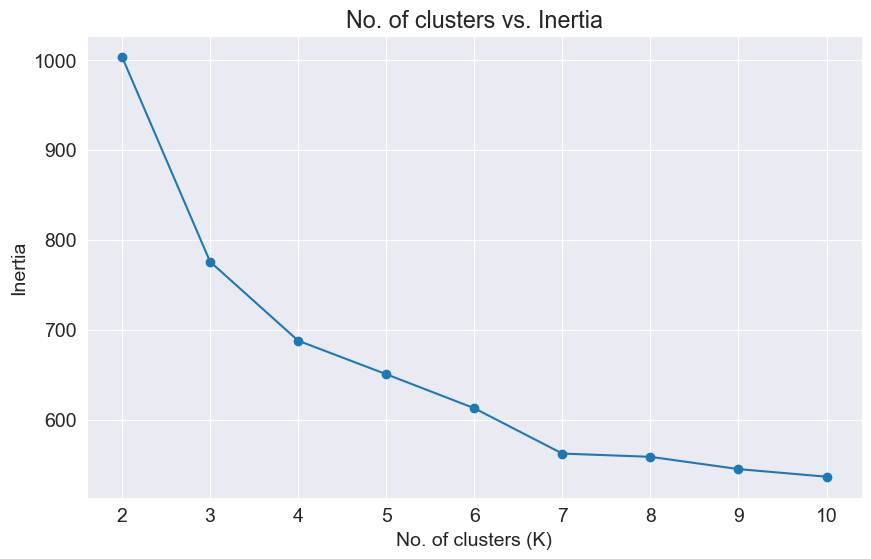

In [15]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X_train)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply. 

Note: Ideally their should be 3 or greater than 3 clusters for better clustering.

In [16]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X_train)

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [17]:
model.cluster_centers_

array([[ 0.13272494,  0.86242848,  0.26742681,  0.58077773,  0.04532438,
        -0.95305043, -1.17844187,  0.75445189, -0.82618483,  0.89094365,
        -1.10687356, -1.38384072, -0.39381823],
       [ 0.93654072, -0.33728997,  0.31402079, -0.72553537,  0.71602307,
         1.04303491,  1.04637979, -0.5399169 ,  0.67483575,  0.25145469,
         0.50310391,  0.81469625,  1.14492417],
       [-0.98309312, -0.18459009, -0.27447327,  0.36472014, -0.51681377,
        -0.08105963,  0.06933763,  0.02343188,  0.03680408, -0.87111123,
         0.36384864,  0.29725913, -0.76697143]])

We can now classify points using the model.

In [18]:
preds = model.predict(X_train)
preds

array([2, 1, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 1, 2, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0,
       1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 2])

In [13]:
# Cluster as new clolumn in dataset using clusters from K-Mean  Clustering

wine_data["KMean_Clusters"] = preds

In [19]:
X_train

array([[-1.65601842, -0.40964706, -1.63217132, ...,  1.19577163,
        -0.66622864, -1.01551358],
       [ 1.3580281 , -0.15830138, -0.24314178, ...,  1.28351841,
         0.78858745,  2.43010864],
       [-0.16134781,  2.04097332,  0.41481959, ..., -1.83149208,
        -1.06171263, -0.38816832],
       ...,
       [ 1.70390229, -0.4186237 ,  0.0492855 , ...,  1.06415147,
         0.54847218,  2.54793491],
       [-0.38369551, -0.72382916, -0.38935541, ...,  0.01119018,
        -0.77922407, -0.8021525 ],
       [-0.81603824,  0.10202093,  0.34171277, ..., -0.69078402,
         1.08520045, -0.98366865]])

In [20]:
k_means = KMeans(n_clusters=3, n_init=5)

labels_train = k_means.fit_predict(X_train)
train_kmeans_avg = silhouette_score(X_train, labels_train)

labels_validation = k_means.predict(X_val)
val_kmeans_avg = silhouette_score(X_val, labels_validation)

labels_test = k_means.predict(X_test)
test_kmeans_avg = silhouette_score(X_test, labels_test)

results = []
results.append({'Model Name' : 'Kmeans',
                'Training Set ': train_kmeans_avg,
                'Validation Set' : val_kmeans_avg,
                'Testing Set': test_kmeans_avg})

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
results

[{'Model Name': 'Kmeans',
  'Training Set ': 0.28293464102955523,
  'Validation Set': 0.26897452670931055,
  'Testing Set': 0.2770212863470136}]

In [22]:
print(f'Silhouette Score on Training Set: {train_kmeans_avg}')

Silhouette Score on Training Set: 0.28293464102955523


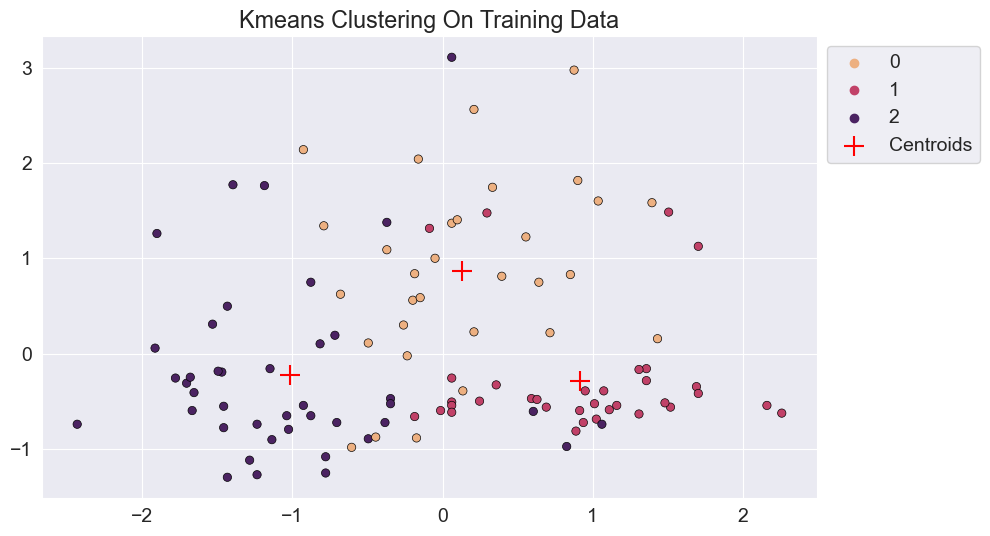

In [23]:
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], data= X_train, hue=labels_train,palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='+', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In summary, there are instances of misclassification, particularly around the "0"th cluster.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [24]:
k_means.inertia_

775.3607231611013

Let's try model building with 2 clusters.

In [31]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(X_train)

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [32]:
model.inertia_

1003.5318653873686

Clearly, `model.inertia_` is almost double for 2 clusters than 3 clusters. So, we can go with 3 clusters.

In [43]:
k_means = KMeans(n_clusters=4, n_init=5)

labels_train = k_means.fit_predict(X_train)
train_kmeans_avg = silhouette_score(X_train, labels_train)

labels_validation = k_means.predict(X_val)
val_kmeans_avg = silhouette_score(X_val, labels_validation)

labels_test = k_means.predict(X_test)
test_kmeans_avg = silhouette_score(X_test, labels_test)

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
print(f'Silhouette Score on Training Set: {train_kmeans_avg}')

Silhouette Score on Training Set: 0.2541970531263985


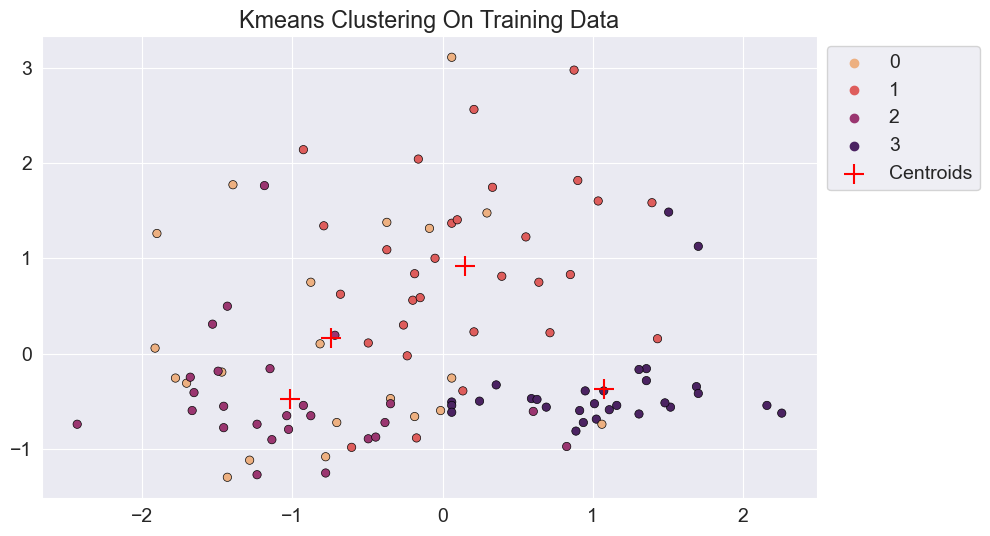

In [45]:
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], data= X_train, hue=labels_train,palette='flare',edgecolor='k')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], c='red', marker='+', s=200, label='Centroids')
plt.title('Kmeans Clustering On Training Data')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Out of curiosity, I has also experimented with 4 clusters, but the results did not meet my satisfaction. Therefore, I have decided to proceed with a cluster analysis using 3 clusters for a more suitable outcome.

### Hierarchical Clustering


Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

1. Mark each point in the dataset as a cluster.
2. Pick the two closest cluster centers without a parent and combine them into a new cluster. 
3. The new cluster is the parent cluster of the two clusters, and its center is the mean of all the points in the cluster.
3. Repeat steps 2 and 3 till there's just one cluster left.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

### Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering algorithm that builds a hierarchy of clusters. The algorithm starts with each data point as a single cluster and successively merges the closest pairs of clusters until a single cluster containing all data points is formed. This hierarchical structure is often represented as a dendrogram.

In [26]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

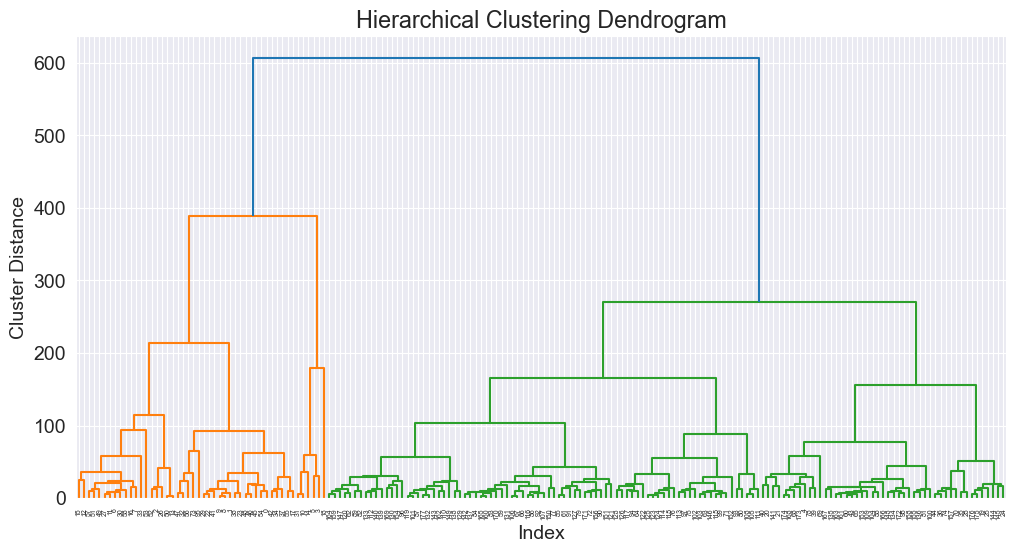

In [27]:
# Trying hierarchical clustering

# Using Dendrogram first for optimal number of clusters
plt.figure(figsize=(12,6))
linked = linkage(wine_data, method='centroid')
dendrogram(linked, orientation='top', distance_sort='descending')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Index")
plt.ylabel("Cluster Distance")
plt.show()


Indeed, employing 3 clusters seems suitable for classifying the wine dataset.

In [28]:
algo = AgglomerativeClustering(n_clusters=3)

labels_train_algo = model.fit_predict(X_train)
train_algo_avg = silhouette_score(X_train, labels_train_algo)
 
labels_validation_algo = model.fit_predict(X_val)
val_algo_avg = silhouette_score(X_val, labels_validation_algo)

labels_test_algo = model.fit_predict(X_test)
test_algo_avg = silhouette_score(X_test, labels_test_algo)

results.append({'Model Name' : 'Agglomerative Clustering',
                'Training Set ': train_algo_avg,
                'Validation Set' : val_algo_avg,
                'Testing Set': test_algo_avg})

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


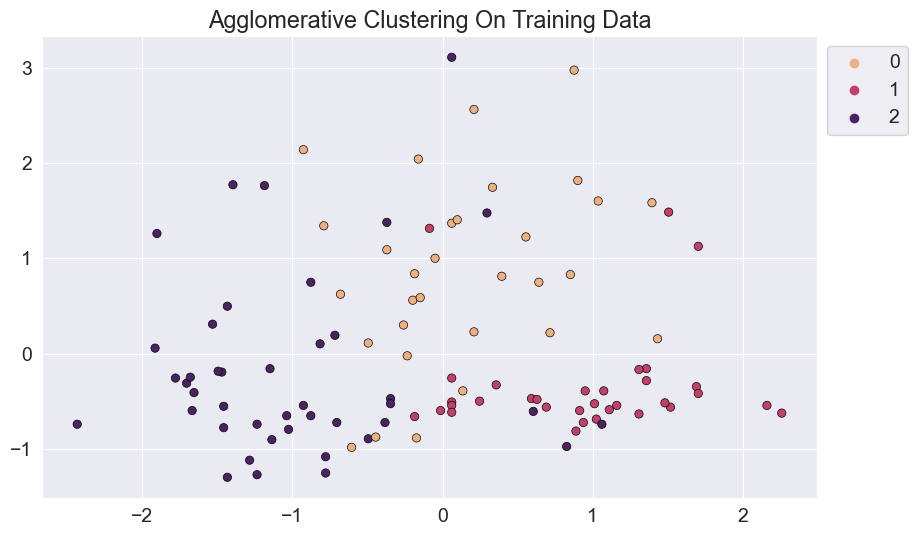

In [29]:
sns.scatterplot(x=X_train[:,0], y= X_train[:,1], data= X_train, hue=labels_train_algo,palette='flare',edgecolor='k')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Agglomerative Clustering On Training Data')
plt.show()


In summary, there are instances of misclassification like K-Means, particularly around the "0"th cluster. 

In [30]:
print(f'Silhouette Score on Training Set: {train_algo_avg}')

Silhouette Score on Training Set: 0.2803649707680054


## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions

### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ

Here's an example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Here's an example of PCA to reduce 3D data to 2D:

<img src="https://www.researchgate.net/publication/345602552/figure/fig1/AS:1028064637104131@1622121118891/PCA-Example-3D-to-2D.png" width="640">


Let's apply Principal Component Analysis to the Iris dataset.

In [31]:
from sklearn.decomposition import PCA

Reducing all the 13 components into 2.

In [32]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.fit_transform(X_val)
X_test_pca = pca.fit_transform(X_test)

In [33]:
# Apply K-Means clustering on the PCA-transformed data
k_means_pca = KMeans(n_clusters=3, random_state=42,n_init=10)

labels_train = k_means.fit_predict(X_train_pca)
train_pca_avg = silhouette_score(X_train_pca, labels_train)

labels_val = k_means.predict(X_val_pca)
val_pca_avg = silhouette_score(X_val_pca, labels_val)

labels_test = k_means.predict(X_test_pca)
test_pca_avg = silhouette_score(X_test_pca, labels_test)

c:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
results.append({'Model Name' : 'PCA with Kmeans',
                'Training Set ': train_pca_avg,
                'Validation Set' : val_pca_avg,
                 'Testing Set': test_pca_avg})

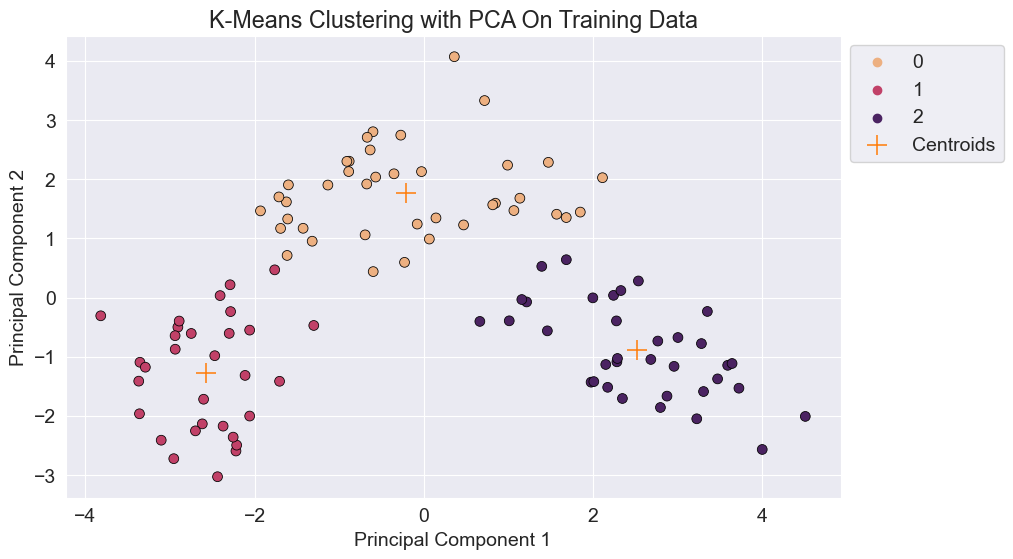

In [37]:
# Visualize the clustering result
sns.scatterplot(x= X_train_pca[:, 0], y=X_train_pca[:, 1], data=X_train_pca, hue=labels_train, marker='o', s=50,palette='flare',edgecolor='k')
sns.scatterplot(x= k_means.cluster_centers_[:, 0], y= k_means.cluster_centers_[:, 1], marker='+', s=200, label='Centroids')
plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

As you can see, the PCA algorithm has done a very good job of separating different categories of wines using just 2 measures. The relative distance between the categories is also conveyed by the gaps between the clusters.

In [38]:
results_df = pd.DataFrame(results)
results_df

,Model Name,Training Set,Validation Set,Testing Set
0,Kmeans,0.282935,0.268975,0.277021
1,Agglomerative Clustering,0.280365,0.268975,0.276613
2,PCA with Kmeans,0.560373,0.457323,0.201893


The following conclusions have been drawn:

-- Among all the models, PCA with K-means exhibits favorable results on a small dataset in classifying wine within the training dataset

-- But its performance on the test dataset is not as robust due to the limited size of the data.

## Summary and References

<img src="https://i.imgur.com/VbVFAsg.png" width="640">

The following topics were covered:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, Hierarchical clustering etc.
- Dimensionality reduction (PCA) 
